In [1]:
import numpy as np
%config InlineBackend.rc = {}
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.utils.data import download_file

from astropy.io import fits
from matplotlib.colors import PowerNorm

import pylab
import numpy

In [2]:
def zscale(img, contrast=0.25, samples=500):
    """
    Image scaling function.
    """
    ravel = img.ravel()
    ravel = ravel[np.isfinite(ravel)]

    if len(ravel) > samples:
        imsort = np.sort(np.random.choice(ravel, size=samples))
    else:
        imsort = np.sort(ravel)

    n = len(imsort)
    idx = np.arange(n)

    med = imsort[int(n/2)]
    w = 0.25
    i_lo, i_hi = int((0.5-w)*n), int((0.5+w)*n)
    # BUG: Sometimes the polyfit could fail
    try:
        p = np.polyfit(idx[i_lo:i_hi], imsort[i_lo:i_hi], 1)
        slope, intercept = p
    except Exception:
        slope = 1.0

    z1 = med - (slope/contrast)*(n/2-n*w)
    z2 = med + (slope/contrast)*(n/2-n*w)

    return z1, z2

In [3]:
bad = fits.open('hsc_images/redadd_126_HSC-I_full_bad.fits')
bad.info()

Filename: hsc_images/redadd_126_HSC-I_full_bad.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      25   (1201, 1201)   uint8   


In [4]:
bad = fits.open('hsc_images/redadd_126_HSC-I_full_bad.fits')
bad_data = bad[0].data[400:800,400:800]
bad.close()

In [5]:
img = fits.open('hsc_images/redadd_126_HSC-I_full_img.fits')
img_data = img[0].data[400:800,400:800]
img.close()

In [6]:
sigma = fits.open('hsc_images/redadd_126_HSC-I_full_sig.fits')
sigma_data = sigma[0].data[400:800,400:800]
sigma.close()

In [8]:
bd_min,bd_max=zscale(bad_data)
id_min,id_max=zscale(img_data)
sd_min,sd_max=zscale(sigma_data)

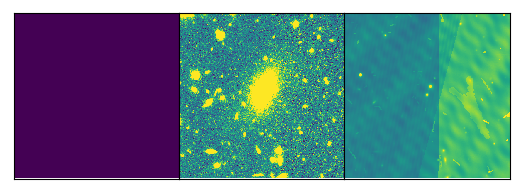

In [25]:
b = plt.subplot(131)
plt.imshow(bad_data, interpolation="none",vmin=bd_min,vmax=bd_max,origin='lower')
i = plt.subplot(132)
plt.imshow(np.arcsinh(img_data),interpolation="none",vmin=id_min,vmax=id_max,origin='lower')
s = plt.subplot(133)
plt.imshow(np.arcsinh(sigma_data),interpolation="none",vmin=sd_min,vmax=sd_max,origin='lower')

axes = [ b, i, s ]
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
final_image = plt.subplots_adjust(wspace=0, hspace=0)

#pylab.savefig('redadd_126_HSC-I_full_concat.png', bbox_inches='tight')

In [ ]:
from os import listdir
from os.path import isfile, join

images = [f for f in listdir('hsc_images/') if isfile(join('hsc_images/', f))]